<a href="https://colab.research.google.com/github/Satyake/Triplet-Loss_Siamese_NN/blob/master/Siamese%20with%20TripletLoss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Not connected to a GPU


In [2]:
from mnist import MNIST
%matplotlib notebook

mndata = MNIST('/home/satyake/Downloads/weatherman')
mndata.gz=True

x_train, y_train = mndata.load_training()
# or
mndata1=MNIST('/home/satyake/Downloads/weatherman')
mndata1.gz=True
x_test,y_test=mndata1.load_testing()
y_train=np.array(y_train)
y_test=np.array(y_test)

TensorFlow version: 2.8.2


In [4]:
import numpy as np 

In [8]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()

In [10]:
x_test.shape

(10000, 28, 28)

In [11]:
x_train=np.reshape(x_train,(60000,784))/255.
x_test=np.reshape(x_test,(10000,784))/255.

10000

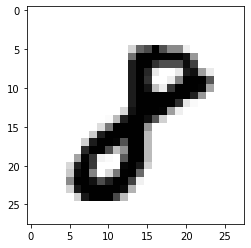

In [12]:
plt.imshow(np.reshape(x_train[31],(28,28)),cmap='binary')
len(x_test)

In [14]:
def plot_triplet(data):
    plt.figure(figsize=(6,3))
    for i in range(0,3):
        plt.subplot(1,3,i+1)
        plt.imshow(np.reshape(data[i],(28,28)),cmap='gray')
    plt.show()

def create_batch(batch_size):
    anchors=np.zeros((batch_size,784))
    positives=np.zeros((batch_size,784))
    negatives=np.zeros((batch_size,784))
    
    for i in range(0,batch_size):
            index=random.randint(0,len(x_train)-1)
            anc=x_train[index]
            label_of_anc=y_train[index]
            indices_of_pos=np.squeeze(np.where(y_train==label_of_anc))
            indices_of_neg=np.squeeze(np.where(y_train!=label_of_anc))
            #print(indices_of_pos)
            pos=x_train[indices_of_pos[random.randint(0,len(indices_of_pos)-1)]]
            neg=x_train[indices_of_neg[random.randint(0,len(indices_of_neg)-1)]]
            positives[i]=pos
            negatives[i]=neg
            anchors[i]=anc
    return [anchors,positives,negatives]
    

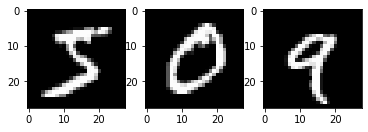

In [15]:
plot_triplet([x_train[0],x_train[1],x_train[4]])  #testing the triplet plot


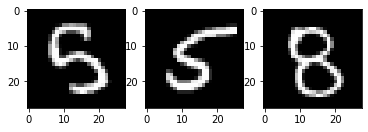

In [16]:
files=create_batch(1)
plot_triplet(files) #CHECKING THE BATCHGEN FUNCTION